Titanic survived Project:

Project Description:
    
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Attribute Information

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Dataset Link-https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv


*Statement Problem:To predict if an arbitrary passenger on Titanic would survive the sinking or not*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
tit_sur=pd.read_csv(r"https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Titanic/titanic_train.csv")

In [3]:
tit_sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 samples and 11 features + the target variable (survived). 
2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

In [4]:
tit_sur.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the data survived the Titanic. 
We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, 
that contain missing values, like the ‘Age’ feature.


In [5]:
tit_sur.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

In [6]:
total = tit_sur.isnull().sum().sort_values(ascending=False)
percent_1 = tit_sur.isnull().sum()/tit_sur.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [7]:
tit_sur.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Above you can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?

To me it would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate

In [8]:
#Dropping the column with over 5% missing values
tit_sur1=tit_sur.drop(columns='Cabin',axis=1)

In [9]:
tit_sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [10]:
#Fill the missing values in Age using the mean age.
tit_sur1['Age'].fillna(tit_sur1['Age'].mean(), inplace=True)

In [11]:
tit_sur1['Embarked'].fillna(tit_sur1['Embarked'].mode()[0], inplace=True)

In [12]:
tit_sur1.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [13]:
data = [tit_sur1]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [14]:
data = [tit_sur1]

for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)

In [15]:
tit_sur1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int32 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int32 
 10  Embarked     891 non-null    int64 
dtypes: int32(2), int64(7), object(2)
memory usage: 69.7+ KB


In [16]:
tit_sur1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30,1


<function matplotlib.pyplot.show(close=None, block=None)>

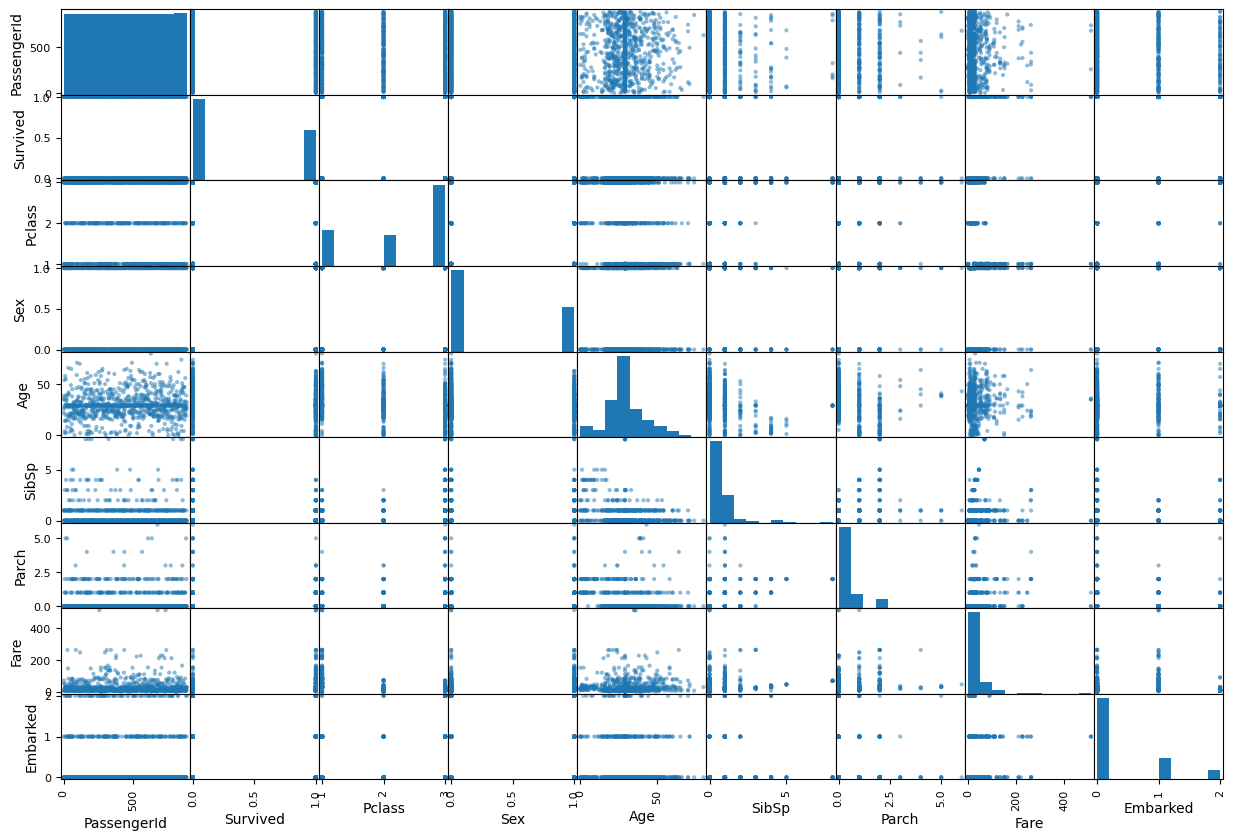

In [17]:
scatter_matrix(tit_sur1,figsize=(15,10))
plt.show

In [18]:
tit_sur1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

No Null Values

In [19]:
tit_sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29,1,2,W./C. 6607,23,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30,1


In [20]:
data = [tit_sur1]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [21]:
tit_sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,71,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,7,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,53,0
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,8,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,3,0,0,211536,13,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,2,0,0,112053,30,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,4,1,2,W./C. 6607,23,0
889,890,1,1,"Behr, Mr. Karl Howell",0,3,0,0,111369,30,1


In [22]:
tit_sur['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
data = [tit_sur1]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
tit_sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,0
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,3,0,0,211536,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,2,0,0,112053,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,4,1,2,W./C. 6607,2,0
889,890,1,1,"Behr, Mr. Karl Howell",0,3,0,0,111369,2,1


In [25]:
X = tit_sur1.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = tit_sur1['Survived']

In [26]:
tit_sur1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,PC 17599,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,3,0,0,STON/O2. 3101282,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,113803,3,0
4,5,0,3,"Allen, Mr. William Henry",0,5,0,0,373450,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,3,0,0,211536,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,2,0,0,112053,2,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,4,1,2,W./C. 6607,2,0
889,890,1,1,"Behr, Mr. Karl Howell",0,3,0,0,111369,2,1


In [27]:
tit_sur2=tit_sur1.drop(columns=['PassengerId','Name','Ticket'])

In [28]:
tit_sur2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,0,0
1,1,1,1,5,1,0,3,1
2,1,3,1,3,0,0,0,0
3,1,1,1,5,1,0,3,0
4,0,3,0,5,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0
887,1,1,1,2,0,0,2,0
888,0,3,1,4,1,2,2,0
889,1,1,0,3,0,0,2,1


Building Machine Learning Models

Now we will train several Machine Learning models and compare their results. Note that because the dataset does not provide labels for their testing-set, we need to use the predictions on the training set to compare the algorithms with each other. Later on, we will use cross validation.

In [29]:
X = tit_sur2.drop("Survived", axis=1)
Y= tit_sur2["Survived"]

In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2,1,0,0,0
1,1,1,5,1,0,3,1
2,3,1,3,0,0,0,0
3,1,1,5,1,0,3,0
4,3,0,5,0,0,1,0
...,...,...,...,...,...,...,...
886,2,0,3,0,0,1,0
887,1,1,2,0,0,2,0
888,3,1,4,1,2,2,0
889,1,0,3,0,0,2,1


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Stochastic Gradient Descent (SGD):

In [32]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

Random Forest:

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

Logistic Regression:

In [34]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

K Nearest Neighbor:

In [35]:
# KNN
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train) 
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

Gaussian Naive Bayes:

In [36]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)
Y_pred =gaussian.predict(X_test) 
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

Perceptron:

In [37]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

Linear Support Vector Machine

In [38]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

Decision Tree

In [39]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

Which is the best Model ?

In [40]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.45,Random Forest
90.45,Decision Tree
86.66,KNN
80.90,Logistic Regression
80.34,Support Vector Machines
77.39,Perceptron
77.25,Naive Bayes
76.83,Stochastic Gradient Decent


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

K-Fold Cross Validation:

In [41]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.77777778 0.73239437 0.87323944 0.81690141 0.74647887
 0.81690141 0.77464789 0.76056338 0.91549296]
Mean: 0.804773082942097
Standard Deviation: 0.05503097125080497
